In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
results_df = pd.read_csv('data/13_estimation_results/kalimantan_multiple_models_cross_validation_results_sorted.csv')

# Remove results from linear model
results_df = results_df[results_df['estimator_name'] != 'LinearRegression']
len(results_df)

1575

In [23]:
# dont use e notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

summary_stats = results_df[['r2_score', 'rmse', 'pearson_r']].describe()
summary_stats



,r2_score,rmse,pearson_r
count,1575.00000,1575.00000,1575.00000
mean,-33.27218,46.48036,0.52238
std,692.94149,107.99740,0.32150
min,-17857.92928,4.58459,-0.57184
25%,-0.31815,10.37976,0.33055
50%,0.13852,17.01259,0.58012
75%,0.52655,44.07612,0.77091
max,0.98417,1878.66707,0.99319


In [25]:
# Performance by model type
model_performance = results_df.groupby('estimator_name')[['r2_score', 'rmse', 'pearson_r']].mean()
model_performance

,r2_score,rmse,pearson_r
estimator_name,,,
GradientBoostingRegressor,-1.62263,35.12224,0.57706
RandomForestRegressor,-0.97798,34.90485,0.58112
Sequential,-97.21594,69.41398,0.40898


In [26]:
# Analyze performance by split type
split_performance = results_df.groupby('validation')[['r2_score', 'rmse', 'pearson_r']].mean()
split_performance


,r2_score,rmse,pearson_r
validation,,,
cross validation index,0.45644,25.86423,0.70754
cross validation month,0.14117,28.91311,0.59198
cross validation station,-113.16950,78.37044,0.45712
cross validation year,-1.01667,46.32816,0.32422


In [27]:
# Analyze performance by split type
split_performance = results_df.groupby('validation')[['r2_score', 'rmse', 'pearson_r']].mean()
split_performance


,r2_score,rmse,pearson_r
validation,,,
cross validation index,0.45644,25.86423,0.70754
cross validation month,0.14117,28.91311,0.59198
cross validation station,-113.16950,78.37044,0.45712
cross validation year,-1.01667,46.32816,0.32422


In [37]:
# Calculating mean R2 and RMSE for each PHU
phu_split_performance = results_df.groupby(['phu_id', 'validation']).agg({
    'pearson_r': 'mean',
    'r2_score': 'mean',
    'rmse': 'mean',
    'no_obs': 'mean'  # Total number of observations for each PHU
}).reset_index()
# Sort by R2 score
phu_split_performance.sort_values(by='r2_score', ascending=False, inplace=True)
# don't show the exponential notation
pd.options.display.float_format = '{:.4f}'.format
phu_split_performance


,phu_id,validation,pearson_r,r2_score,rmse,no_obs
24,350.0000,cross validation index,0.8897,0.7852,15.4548,358.0000
28,351.0000,cross validation index,0.8891,0.7827,19.5595,982.0000
32,352.0000,cross validation index,0.8859,0.7771,43.7622,276.0000
11,297.0000,cross validation month,0.8840,0.7473,12.2139,159.0000
36,357.0000,cross validation index,0.8866,0.7416,25.1031,141.0000
10,297.0000,cross validation index,0.8836,0.7333,11.8218,159.0000
25,350.0000,cross validation month,0.8671,0.7217,15.3243,358.0000
29,351.0000,cross validation month,0.8475,0.7113,19.7213,982.0000
37,357.0000,cross validation month,0.8915,0.6623,25.5570,141.0000
33,352.0000,cross validation month,0.8025,0.6036,69.1618,276.0000


In [38]:
# Calculating mean R2 and RMSE for each PHU
df_filter = (~results_df.estimator_name.isin(["Sequential"]))
phu_split_performance = results_df[df_filter].groupby(['phu_id']).agg({
    'pearson_r': 'median',
    'r2_score': 'median',
    'rmse': 'median',
    'no_obs': 'median'  # Total number of observations for each PHU
}).reset_index()
# Sort by R2 score
phu_split_performance.sort_values(by='r2_score', ascending=False, inplace=True)
# don't show the exponential notation
pd.options.display.float_format = '{:.4f}'.format
phu_split_performance.head()

phu_split_performance

,phu_id,pearson_r,r2_score,rmse,no_obs
10,357.0000,0.8714,0.7221,25.9353,141.0000
3,297.0000,0.8589,0.7085,11.9431,159.0000
7,350.0000,0.8175,0.6368,18.2327,358.0000
8,351.0000,0.8275,0.5904,20.3139,982.0000
9,352.0000,0.7637,0.5442,27.1283,276.0000
13,379.0000,0.8121,0.4856,30.8998,65.0000
2,256.0000,0.6371,0.3317,6.7224,849.0000
16,407.0000,0.6135,0.2880,8.9380,200.0000
6,340.0000,0.5562,0.2176,6.7044,1546.0000
11,371.0000,0.5064,0.1793,12.5354,280.0000


In [44]:
best_phus = phu_split_performance.head(5).phu_id.values
best_phus

array([357., 297., 350., 351., 352.])

## Train the model

In [45]:
from gee_scripts.parameters import explain_vars
from gee_scripts.models import get_random_forest, get_regressors
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error
from gee_scripts.plots import plot_observed_vs_predicted

import seaborn as sns


Earth Engine initialized successfully, with ee-indonesia-gwl


2024-06-26 16:56:26.438836: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 16:56:26.440442: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 16:56:26.467079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 16:56:26.467666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 16:56:26.920458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [46]:
# USER PARAMETERS

# Select the region where to work
region = "kalimantan"

## List of specific id values to remove
# These stations were selected based on the results of the previous analysis
bad_stations = ['batok1','batok2','brg11','brg13','brg16','BRG_620309_01','BRG_620309_02','BRG_630805_01','BRG_630708_01']



In [57]:
df = pd.read_csv("data/9_clean_training_data/all_training_data_with_extra_and_locations_and_precipSum.csv", parse_dates=["date"])
assert len(df) == 32783, "The length of the dataframe is not correct"
df = df[(~df.id.isin(bad_stations)) & (df.phu_id.isin(best_phus))]
print(len(df))

data = df.copy()

1916


lenght of train and test 1425 491
r2_score: 0.8581409269823023
rmse: 24.679282110379756
pearson r: 0.9364688841099689
p-value: 1.229459846056177e-224


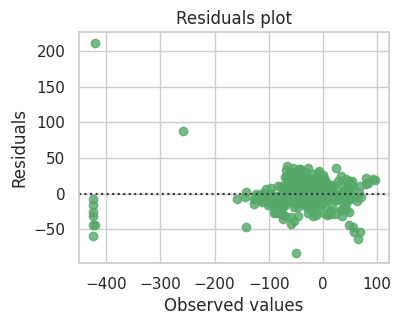

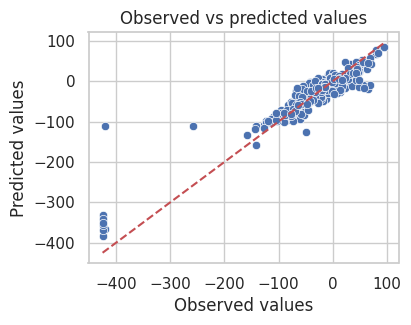

In [51]:

train_data = data[data["date"].dt.month.isin([1,2,4,5,7,8,10,11,12])]
test_data = data[data["date"].dt.month.isin([3,6,9,])]

X_train, X_test = train_data[explain_vars], test_data[explain_vars]
y_train, y_test = train_data["gwl_cm"], test_data["gwl_cm"]

print("lenght of train and test", len(X_train), len(X_test))

####################### TRAIN

regr = get_random_forest()

regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

r, p = pearsonr(y_test, y_pred_test)
r2_score_val = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# print all the metrics
print(f"r2_score: {r2_score_val}")
print(f"rmse: {rmse}")
print(f"pearson r: {r}")
print(f"p-value: {p}")

plot_observed_vs_predicted(y_test, y_pred_test, "Observed vs Predicted GWL")


In [ ]:
# df.loc[df.id == "brg11", "gwl_cm"] = df[df.id == "brg11"]["gwl_cm"]/10

In [ ]:
# # set graph size
# plt.figure(figsize=(5, 5))
# sns.lineplot(x="date", y="gwl_cm", data=df[df.id == "brg11"])
# # rotate x-axis labels
# plt.xticks(rotation=45);



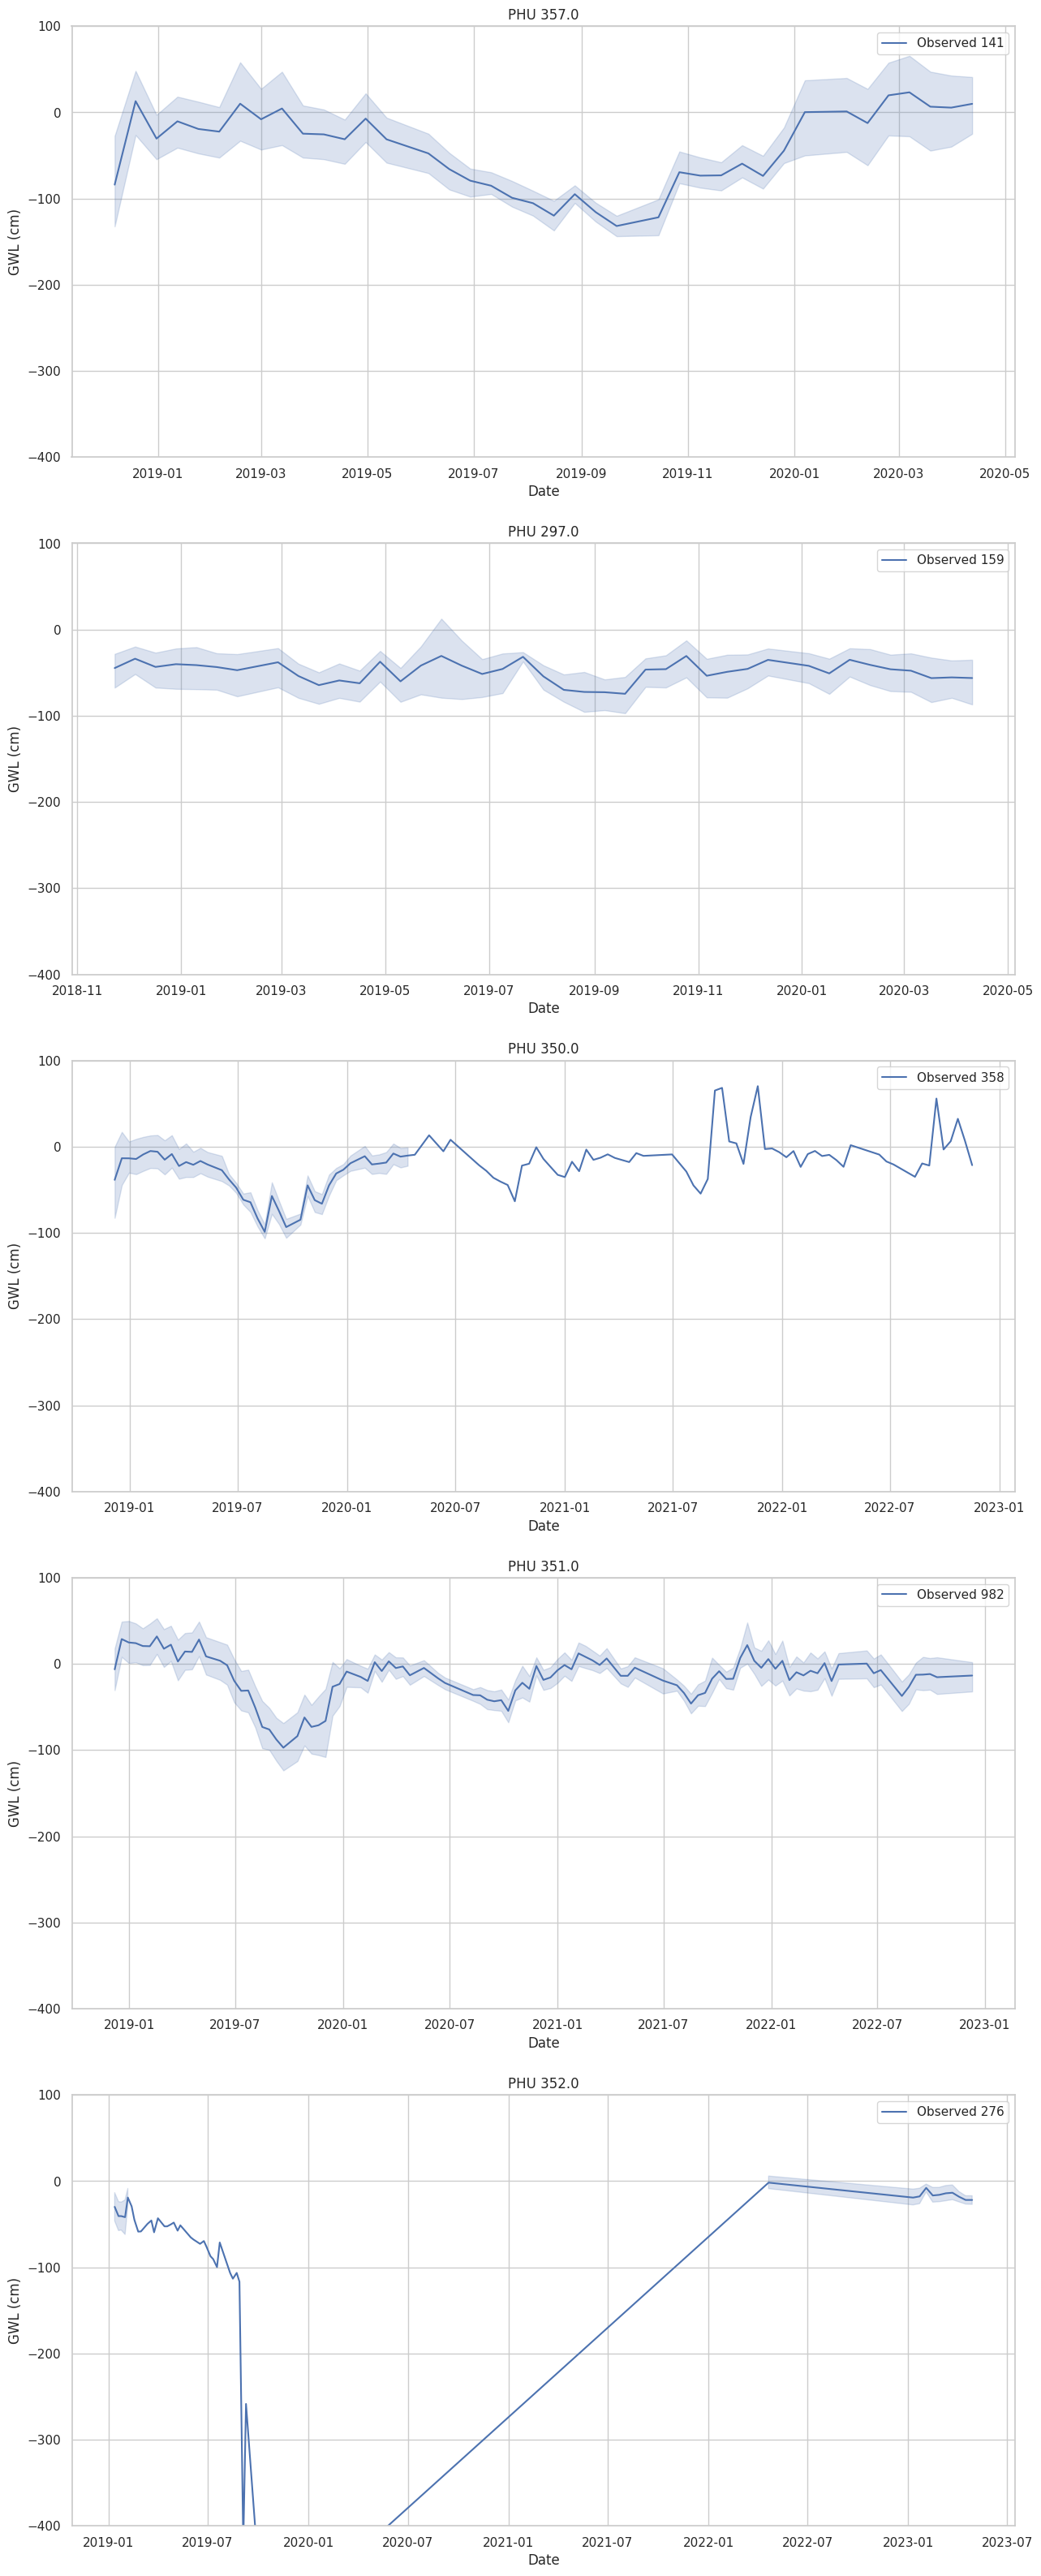

In [52]:
# plot the gwl_cm vs date for each phu in different plots

fig, axs = plt.subplots(5, 1, figsize=(15, 40))

for i, phu in enumerate(best_phus):
    
    plot_data = df[df.phu_id == phu].copy()
    plot_data.sort_values(by="date", inplace=True)
    
    sns.lineplot(x="date", y="gwl_cm", data=plot_data, ax=axs[i], label=f"Observed {len(plot_data)}")

    # use the same scale for all the plots
    axs[i].set_ylim(-400, 100)
    axs[i].set_title(f"PHU {phu}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("GWL (cm)")




In [ ]:
data.phu_id.unique()

lenght of train and test 1506 377
r2_score: 0.8351769256958579
rmse: 16.5005736845434
pearson r: 0.9174798892568405
p-value: 3.302275424085197e-152


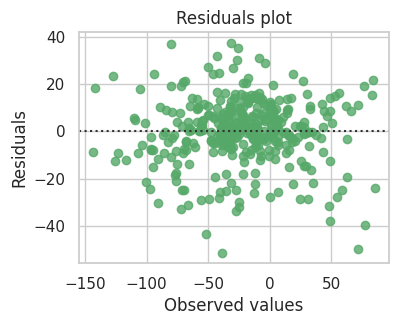

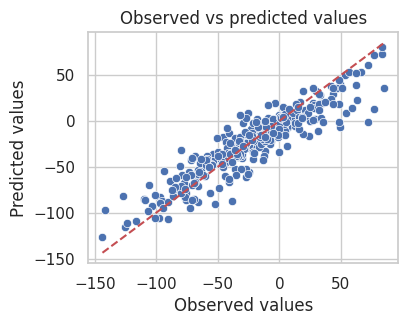

In [53]:
# divide test/train by random sampling

# randomly select 80% as train and the rest as test

train_data = data[data.gwl_cm>-150].sample(frac=0.8)
test_data = data[data.gwl_cm>-150].drop(train_data.index)

X_train, X_test = train_data[explain_vars], test_data[explain_vars]
y_train, y_test = train_data["gwl_cm"], test_data["gwl_cm"]

print("lenght of train and test", len(X_train), len(X_test))

####################### TRAIN

regr = get_random_forest()

regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

r, p = pearsonr(y_test, y_pred_test)
r2_score_val = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# print all the metrics
print(f"r2_score: {r2_score_val}")
print(f"rmse: {rmse}")
print(f"pearson r: {r}")
print(f"p-value: {p}")

plot_observed_vs_predicted(y_test, y_pred_test, "Observed vs Predicted GWL")


In [54]:
from gee_scripts.models import bootstrap

In [55]:
bootrap_result = bootstrap(data[data.gwl_cm>-150], "gwl_cm", 25, 0.8, explain_vars)
bootrap_result

Training with 1883 observations


,mean,min,max,median
r,0.8910,0.8197,0.9195,0.8972
r2,0.7896,0.6698,0.8359,0.7981
rmse,17.6705,15.6449,20.7563,17.7542
samples_train,1506.0000,1506.0000,1506.0000,NaN
samples_test,377.0000,377.0000,377.0000,NaN
